In [195]:
#Python DVP A4 by Team-1_Datavana
#Team Members
#Revanth Madasu_999903540
#Anusha Pakkiru_999903534

#Use Case: Elite Party Services

In [1]:
import piplite 
await piplite.install("seaborn") 

In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
await piplite.install("openpyxl")

In [3]:
# df = pd.read_csv('BankChurners.csv')# To load a CSV dataset file with a specific filename and assign it to a variable called "df".
M1 = pd.ExcelFile('1 - Elite Party Services - M1 - Initial dataset.xlsx')
M2 = pd.ExcelFile('1 - Elite Party Services - M2 - Change Over Time.xlsx')
M3 = pd.ExcelFile('1 - Elite Party Services - M3 - Data Composition.xlsx')
M4 = pd.ExcelFile('1 - Elite Party Services - M4 - Data Distributions.xlsx')


M1_Data = pd.read_excel(M1, '1 - Elite Party Services - M1')
M2_Data = pd.read_excel(M2, '1 - Elite Party Services - M2')
M3_Data = pd.read_excel(M3, '1 - Elite Party Services - M3')
M4_Data = pd.read_excel(M4, '1 - Elite Party Services - M4')

M1_M2 = pd.merge(M1_Data, M2_Data, on="ID")
M1_M2_M3 = pd.merge(M1_M2, M3_Data, on="ID")
M1_M2_M3_M4 = pd.merge(M1_M2_M3, M4_Data, on="ID")

# print(M1.sheet_names)
# print(M2.sheet_names)
# print(M3.sheet_names)
# print(M4.sheet_names)

In [4]:

M1_M2_M3_M4.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Date,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16
0,1,4,1,9,23,4,1,1,2022-08-18,1,2,1,1,6,5,3,2,1
1,2,2,2,5,24,4,2,8,2022-05-01,-1,0,-1,2,3,3,3,2,2
2,3,4,1,9,19,3,9,1,2022-02-19,-1,3,1,2,3,1,3,3,1
3,4,4,1,9,20,3,2,8,2022-11-05,-2,1,2,0,3,1,1,1,1
4,5,3,1,6,24,4,9,1,2022-09-29,1,2,-2,1,5,2,3,1,1


In [5]:
M1_M2_M3_M4.columns 

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Date', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16'],
      dtype='object')

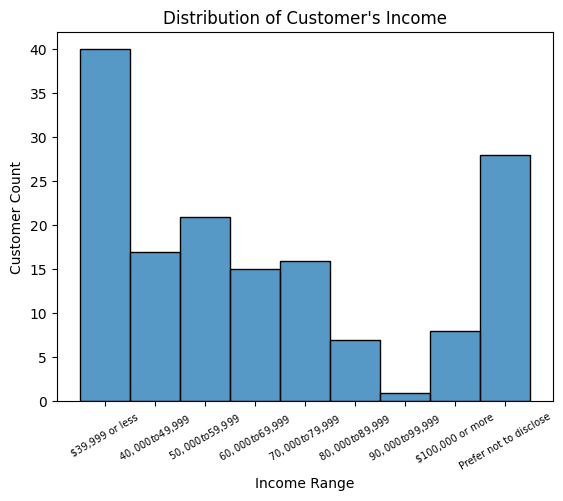

In [6]:
income_ranges = {
    1: '$39,999 or less',
    2: '$40,000 to $49,999',
    3: '$50,000 to $59,999',
    4: '$60,000 to $69,999',
    5: '$70,000 to $79,999',
    6: '$80,000 to $89,999',
    7: '$90,000 to $99,999',
    8: '$100,000 or more',
    9: 'Prefer not to disclose'
}
x_labels = [income_ranges[i] for i in range(1, 10)]
x_ticks = list(range(1, 10))
sns.histplot(M1_M2_M3_M4['Q6'], bins=range(1, 11), discrete=True).set(
    title="Distribution of Customer's Income",
    xlabel="Income Range",
    ylabel="Customer Count"
)

plt.xticks(x_ticks, x_labels, fontsize=7, rotation = 30)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("Customer's-Income-Distribution-Hikstognram-Python.png",dpi=110)
plt.show()

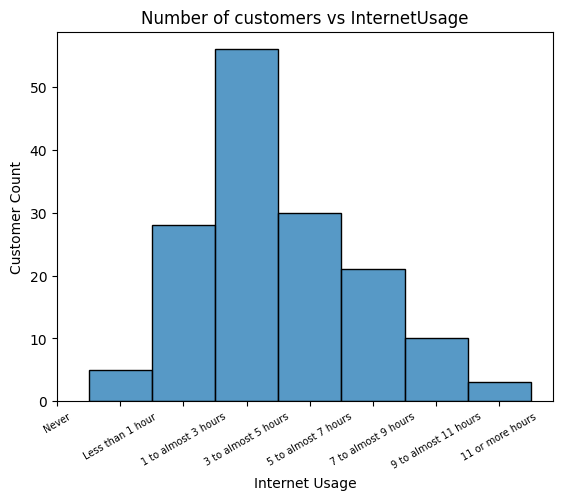

In [7]:

internet_usage_ranges = {
    1: 'Never',
    2: 'Less than 1 hour',
    3: '1 to almost 3 hours',
    4: '3 to almost 5 hours',
    5: '5 to almost 7 hours',
    6: '7 to almost 9 hours',
    7: '9 to almost 11 hours',
    8: '11 or more hours'
}
x_labels = [internet_usage_ranges[i] for i in range(1, 9)]
x_ticks = list(range(1, 9))
plt.ticklabel_format(style = 'plain')
sns.histplot(M1_M2_M3_M4["Q12"],bins=range(1, 9), discrete=True).set(title="Number of customers vs InternetUsage", xlabel="Internet Usage", ylabel="Customer Count") 
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(x_ticks, x_labels, fontsize=7, rotation = 30)
plt.savefig("Number of customers vs InternetUsage.png")
plt.show()

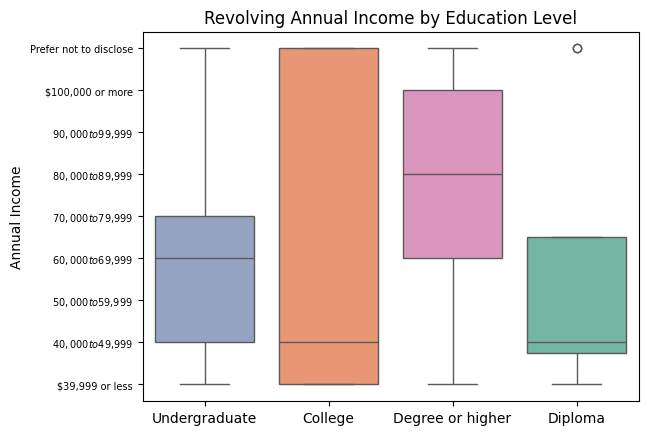

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


education_levels = {
    1: 'High school',
    2: 'Diploma',
    3: 'College',
    4: 'Undergraduate',
    5: "Degree or higher",
    6: 'Doctorate'
}
x_labels = [education_levels[i] for i in range(1, 7)]


unique_values_Q5 = list(range(1,7))
# print(unique_values_Q5)

education_df = pd.DataFrame({'Q5': unique_values_Q5, 'Education Level': x_labels})


M1_M2_M3_M4['education'] = M1_M2_M3_M4.apply(lambda row: education_levels[row.Q5], axis=1)


y_labels = [income_ranges[i] for i in range(1, 10)]

custom_palette = sns.color_palette("Set2", 4)
sns.boxplot(x=M1_M2_M3_M4['education'], y=M1_M2_M3_M4['Q6'], palette=custom_palette, hue=M1_M2_M3_M4['Q5'], legend=False)
plt.title("Revolving Annual Income by Education Level")
plt.xlabel("")
plt.ylabel("Annual Income")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))


plt.yticks(range(1, 10), y_labels, fontsize=7)


plt.savefig("Revolving Annual Income by Education Level.png")
plt.show()


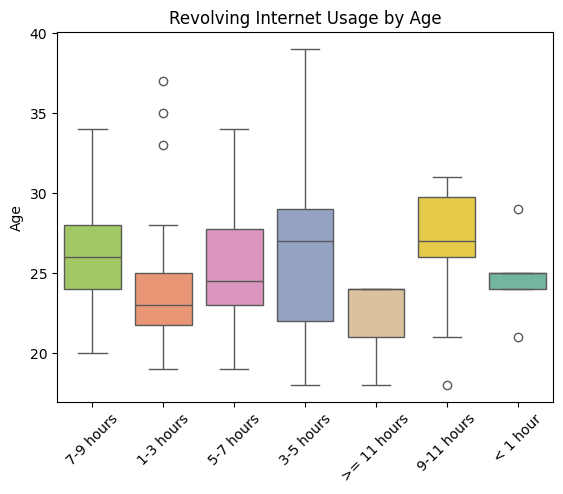

In [9]:
# plt.figure(figsize=(10, 8))
internet_usage_ranges = {
    1: 'Never',
    2: '< 1 hour',
    3: '1-3 hours',
    4: '3-5 hours',
    5: '5-7 hours',
    6: '7-9 hours',
    7: '9-11 hours',
    8: '>= 11 hours'
}
x_labels = [internet_usage_ranges[i] for i in range(1, 9)]
# x_ticks = list(range(1, 9))
unique_values_Q12 = list(range(1,9))

M1_M2_M3_M4['internet_usage'] = M1_M2_M3_M4.apply(lambda row: internet_usage_ranges[row.Q12], axis=1)

custom_palette = sns.color_palette("Set2", 7)
sns.boxplot(x=M1_M2_M3_M4['internet_usage'], y=M1_M2_M3_M4['Q4'],palette=custom_palette,hue=M1_M2_M3_M4['Q12'],legend=False).set(title="Revolving Internet Usage by Age", xlabel="", ylabel="Age") 
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation = 45)

plt.savefig("Revolving Education Level by Age.png") 
plt.show() 

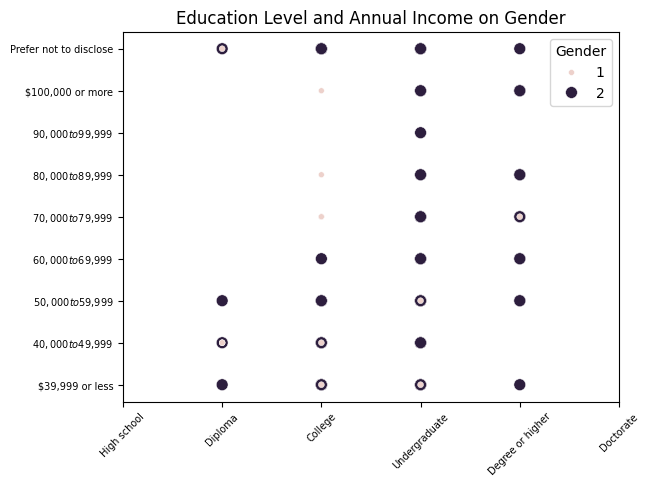

In [10]:

x_labels = [education_levels[i] for i in range(1, 7)]
x_ticks = list(range(1, 7))
y_labels = [income_ranges[i] for i in range(1, 10)]
y_ticks = list(range(1, 10))
sns.scatterplot(data=M1_M2_M3_M4, x="Q5", y="Q6", size="Q2", hue="Q2", legend="brief", ).set(title="Education Level and Annual Income on Gender", xlabel="", ylabel="")
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.legend(title="Gender", loc="best")
plt.xticks(x_ticks, x_labels, fontsize=7, rotation = 45)
plt.yticks(y_ticks, y_labels, fontsize=7)
plt.savefig("Education Level and Annual Income on Gender.png")
plt.show() 
